# MEAN DIFFERENCE with Precipitation dataset

Finding mean difference between four models for DJF seaoson. 

In [2]:
import xarray as xr
import numpy as np
import pandas as pd
from pandas import Series

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
from mpl_toolkits.axes_grid1.axes_divider import make_axes_area_auto_adjustable

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes

### Loading datasets

In [3]:
# precip_wrf_ds
ds_wrf_1980 = xr.open_dataset('./data/DOE_VIC.narr_wrf.monthly.pr.1980-2012.nc')
ds_wrf_2091 = xr.open_dataset('./data/DOE_VIC.narr_wrf.monthly.pr.2091-2100.nc')

# precip_loca_wrf
ds_loca_wrf_1980 = xr.open_dataset('./data/DOE_VIC.narr_LOCA_wrf.monthly.pr.1980-2012.nc')
ds_loca_wrf_2091 = xr.open_dataset('./data/DOE_VIC.narr_LOCA_wrf.monthly.pr.2091-2100.nc')

# precip_loca_14
ds_loca_14_1980 = xr.open_dataset('./data/DOE_VIC.narr_LOCA_L14.monthly.pr.1980-2012.nc')
ds_loca_14_2091 = xr.open_dataset('./data/DOE_VIC.narr_LOCA_L14.monthly.pr.2091-2100.nc')

# precip_bcsd_L14
ds_bcsd_L14_1980 = xr.open_dataset('./data/DOE_VIC.narr_BCSD_L14.monthly.pr.1980-2012.nc')
ds_bcsd_L14_2091 = xr.open_dataset('./data/DOE_VIC.narr_BCSD_L14.monthly.pr.2091-2100.nc')

In [4]:
# Export to pandas and check for not null values
#test_df = ds_wrf_1980.to_dataframe()
#test_df[test_df['pr'].notnull()]
#ds_wrf_1980.notnull()

#### Slicing from 1991 to end of 2000

In [5]:
pr_wrf_from_1991 = ds_wrf_1980['pr'].sel(time=slice('1991-01-01', '2000-12-31'))
pr_loca_wrf_from_1991 = ds_loca_wrf_1980['pr'].sel(time=slice('1991-01-01','2000-12-31'))
pr_loca_14_from_1991 = ds_loca_14_1980['pr'].sel(time=slice('1991-01-01','2000-12-31'))
pr_bcsd_L14_from_1991 = ds_bcsd_L14_1980['pr'].sel(time=slice('1991-01-01', '2000-12-31'))

cbar_range = set()

def add_to_cbar(ds, var_str):
    get_df = ds.to_dataframe()
    cbar_range.add(get_df[var_str].min())
    cbar_range.add(get_df[var_str].max())

#### Mean difference of narr_wrf


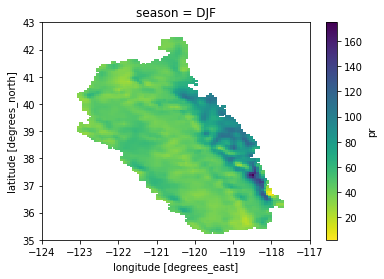

In [6]:
pr_wrf_1991 = pr_wrf_from_1991.groupby('time.season').mean('time')
#pr_wrf_2091 = ds_wrf_2091['pr'].where(pd.notnull(ds_wrf_2091['pr'])).groupby('time.season').mean('time')
pr_wrf_2091 = ds_wrf_2091['pr'].groupby('time.season').mean('time')
mean_diff_wrf_1991_2091 = ((pr_wrf_2091.sel(season='DJF') - pr_wrf_1991.sel(season='DJF')) / pr_wrf_1991.sel(season='DJF')) * 100 
mean_diff_wrf_1991_2091.plot(cmap='viridis_r')


In [7]:
add_to_cbar(mean_diff_wrf_1991_2091, 'pr')

In [8]:
cbar_range

{2.2081294, 174.68903}

#### Mean difference of narr_loca_wrf

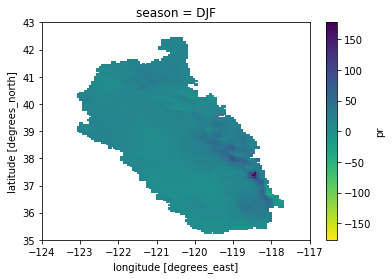

In [9]:
pr_loca_wrf_1991 = pr_loca_wrf_from_1991.groupby('time.season').mean('time')
pr_loca_wrf_2091 = ds_loca_wrf_2091['pr'].groupby('time.season').mean('time')
mean_diff_loca_wrf_1991_2091 = ((pr_loca_wrf_2091.sel(season='DJF') - pr_loca_wrf_1991.sel(season='DJF') )/  pr_loca_wrf_1991.sel(season='DJF')) * 100
mean_diff_loca_wrf_1991_2091.plot(cmap='viridis_r')



In [10]:
add_to_cbar(mean_diff_loca_wrf_1991_2091, 'pr')

#### Mean difference of narr_loca_14

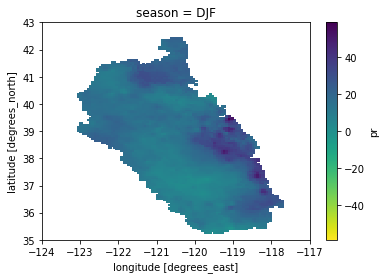

In [11]:
pr_loca_14_1991 = pr_loca_14_from_1991.groupby('time.season').mean('time')
pr_loca_14_2091 = ds_loca_14_2091['pr'].groupby('time.season').mean('time')
mean_diff_loca_14_1991_2091 = ((pr_loca_14_2091.sel(season='DJF') - pr_loca_14_1991.sel(season='DJF')) / pr_loca_14_1991.sel(season='DJF') ) * 100
mean_diff_loca_14_1991_2091.plot(cmap='viridis_r')

In [12]:
add_to_cbar(mean_diff_loca_14_1991_2091, 'pr')

#### Mean difference of narr_bcsd_L14

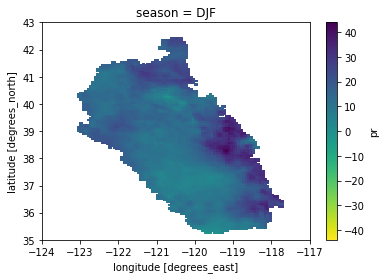

In [13]:
pr_bcsd_L14_1991 = pr_bcsd_L14_from_1991.groupby('time.season').mean('time')
pr_bcsd_L14_2091 = ds_bcsd_L14_2091['pr'].groupby('time.season').mean('time')
mean_diff_bcsd_L14_1991_2091 = ((pr_loca_14_2091.sel(season='DJF') - pr_bcsd_L14_1991.sel(season='DJF')) / pr_bcsd_L14_1991 .sel(season='DJF')) *100
mean_diff_bcsd_L14_1991_2091.plot(cmap='viridis_r')

In [14]:
add_to_cbar(mean_diff_bcsd_L14_1991_2091, 'pr')

## Multi-plots

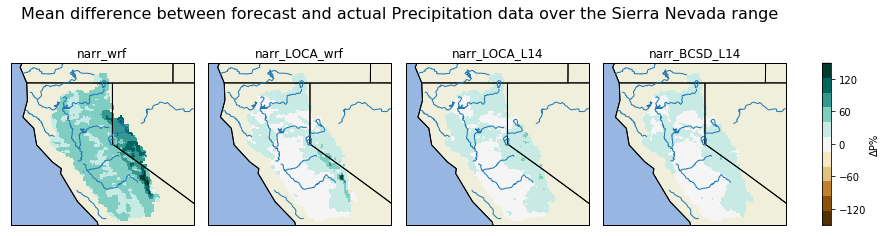

In [15]:

mean_list = [mean_diff_wrf_1991_2091, mean_diff_loca_wrf_1991_2091, mean_diff_loca_14_1991_2091, mean_diff_bcsd_L14_1991_2091]

# Configuration for the map
projection = ccrs.PlateCarree()
axes_class = (GeoAxes, dict(map_projection=projection))
fig = plt.figure(figsize=(15, 15))
axgr = AxesGrid(fig, 
                111, 
                axes_class=axes_class,
                nrows_ncols=(1, 4),
                axes_pad=0.2,
                share_all=True,
                label_mode="",
                cbar_location="right",
                cbar_mode="single",
                cbar_pad=0.5
               )
cbar_label_title = 'ΔP%'


for i, ax in enumerate(axgr):
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.STATES)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAKES)
    ax.add_feature(cfeature.LAND)    
    ax.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='none', edgecolor='tab:blue')
    ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='tab:blue')   
    # setting the location t
    ax.set_extent([-125, -116, 43, 35])

    djf_plt = mean_list[i].plot.pcolormesh(ax=axgr[i], transform=ccrs.PlateCarree(), x='longitude', y='latitude', cmap=plt.get_cmap('BrBG', 11), add_colorbar=False)
    #djf_plt.set_clim(min(cbar_range), max(cbar_range))
    djf_plt.set_clim(-150, 150)

axgr[0].set_title('narr_wrf')
axgr[1].set_title('narr_LOCA_wrf')
axgr[2].set_title('narr_LOCA_L14')
axgr[3].set_title('narr_BCSD_L14')

fig.subplots_adjust(left=0.14, top=1.64)
fig.suptitle('Mean difference between forecast and actual Precipitation data over the Sierra Nevada range', fontsize=16, y=1.01)
cb = axgr.cbar_axes[0].colorbar(djf_plt)
cb.set_label_text(cbar_label_title)

#### Configuration for the map

```` python
projection = ccrs.PlateCarree()
axes_class = (GeoAxes, dict(map_projection=projection))
fig = plt.figure(figsize=(15, 15))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
               nrows_ncols=(4, 2),
               axes_pad = 0.5,
                cbar_location="right",
                    cbar_mode="single",

               label_mode='')
cbar_label_title = 'ΔP%'

for i, season in enumerate(('DJF', 'MAM')):
    mean_diff_wrf_1991_2091 = ((pr_wrf_2091.sel(season=season) - pr_wrf_1991.sel(season=season)) / pr_wrf_1991.sel(season=season)) * 100
    mean_diff_loca_wrf_1991_2091 = ((pr_loca_wrf_2091.sel(season=season) - pr_loca_wrf_1991.sel(season=season)) / pr_loca_wrf_1991.sel(season=season)) * 100
    mean_diff_loca_14_1991_2091 = ((pr_loca_14_2091.sel(season=season) - pr_loca_14_1991.sel(season=season)) / pr_loca_14_1991.sel(season=season)) * 100
    mean_diff_bcsd_L14_1991_2091 = ((pr_bcsd_L14_2091.sel(season=season) - pr_bcsd_L14_1991.sel(season=season)) / pr_bcsd_L14_1991.sel(season=season)) * 100
    
    test_plt_month = mean_diff_wrf_1991_2091.plot.pcolormesh(ax=axgr[i], add_colorbar=False, x='longitude', y='latitude', cmap='viridis_r')
    test_plt_month = mean_diff_loca_wrf_1991_2091.plot.pcolormesh(ax=axgr[2+i], add_colorbar=False, x='longitude', y='latitude', cmap='viridis_r')
    test_plt_month = mean_diff_bcsd_L14_1991_2091.plot.pcolormesh(ax=axgr[4+i], add_colorbar=False, x='longitude', y='latitude', cmap='viridis_r')
    test_plt_month = mean_diff_loca_14_1991_2091.plot.pcolormesh(ax=axgr[6+i], add_colorbar=False, x='longitude', y='latitude', cmap='viridis_r')

    
for i, ax in enumerate(axgr):
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.STATES)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAKES)
    ax.set_extent([-125, -116, 43, 35])
    ax.set_xlabel("ayy")
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='none', edgecolor='tab:blue')
    ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='tab:blue')   
    
axgr[0].yaxis.set_label_position('left')
axgr[0].yaxis.set_label_text('latitude')

cb = axgr.cbar_axes[0].colorbar(test_plt_month)
cb.set_label_text(cbar_label_title)
````

_____________________________

## SEASONAL VARIATION OF PRECIPITATION OVER SIERRA NEVADA RANGE

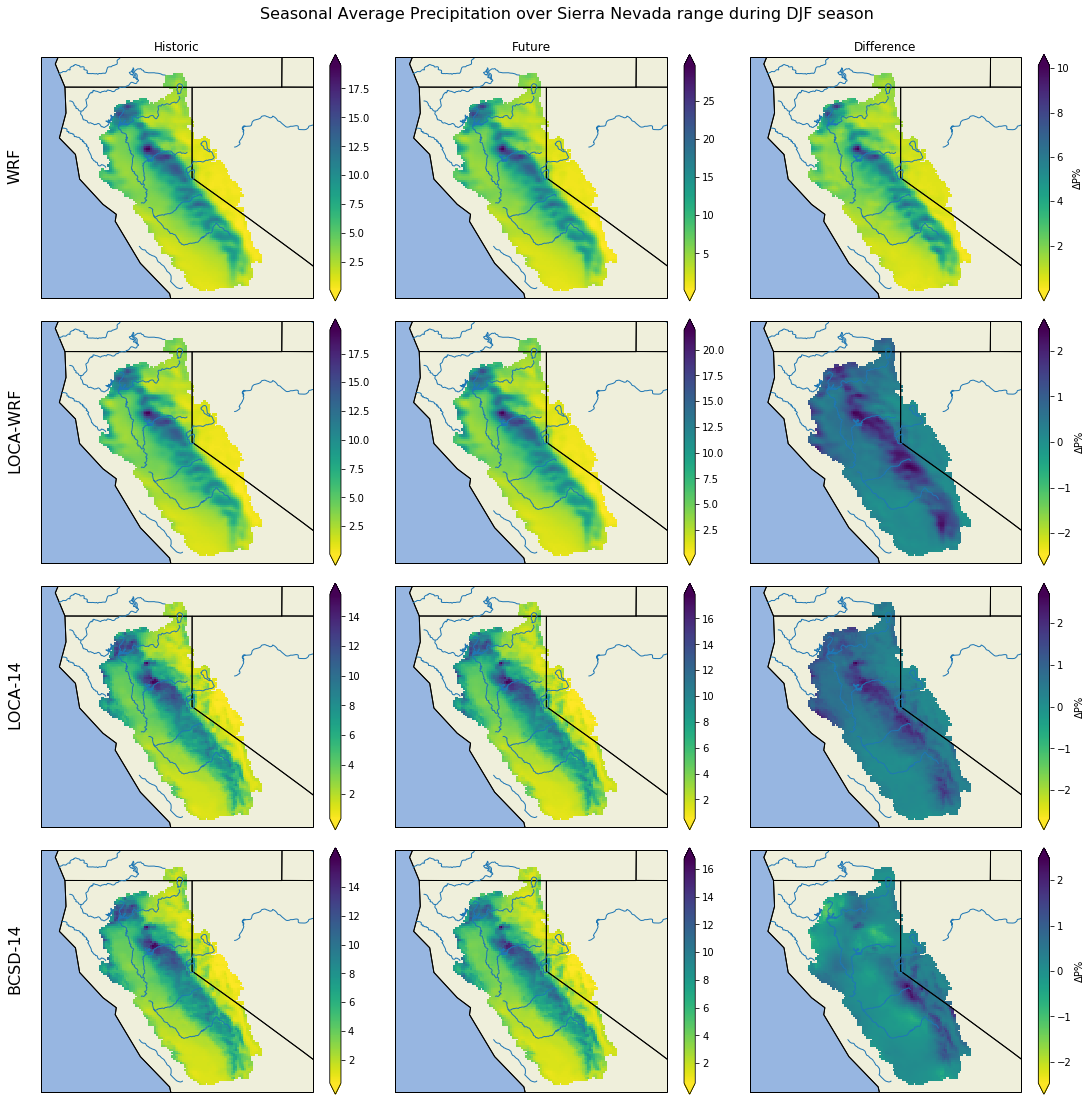

In [43]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15), subplot_kw={'projection': ccrs.PlateCarree()})

season_str = 'DJF'
cbar_label_title = 'ΔP%'
cbar_color = 'viridis_r'

# Historic Mean Temperature, 1991-01-01 to 2000-12-31
past_mean = [
    pr_wrf_1991.sel(season=season_str), 
    pr_loca_wrf_1991.sel(season=season_str),
    pr_loca_14_1991.sel(season=season_str),
    pr_bcsd_L14_1991.sel(season=season_str)
]

# Future Mean Temperature
future_mean = [
    pr_wrf_2091.sel(season=season_str),
    pr_loca_wrf_2091.sel(season=season_str),
    pr_loca_14_2091.sel(season=season_str),
    pr_bcsd_L14_2091.sel(season=season_str)
]

models = ('WRF', 'LOCA-WRF', 'LOCA-14', 'BCSD-14')

for i, model in enumerate(models):
    past_mean[i].plot(cmap=cbar_color, add_colorbar=True, ax=axes[i, 0], extend='both', add_labels=False)
    future_mean[i].plot(cmap=cbar_color, add_colorbar=True, ax=axes[i, 1], extend='both', add_labels=False)
    diff_plt = future_mean[i] - past_mean[i]
    diff_plt.plot(cmap=cbar_color, ax=axes[i, 2], extend='both', cbar_kwargs={'label': cbar_label_title})
    axes[i, 0].set_ylabel(model)
    axes[i, 1].set_ylabel('')
    axes[i, 2].set_ylabel('')
    if i > 0:
        axes[i, 0].set_title("")
        axes[i, 1].set_title("")
        axes[i, 2].set_title("")
  
axes[0, 0].set_title('Historic')
axes[0, 1].set_title('Future')
axes[0, 2].set_title('Difference')
my_suptitle = fig.suptitle('Seasonal Average Precipitation over Sierra Nevada range during {0} season'.format(season_str), fontsize=16, y=1.02)

counter = 0
for i, ax in enumerate(axes.flat):
    #ax.axes.axis('tight')
    ax.set_xlabel('')
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.STATES)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='none', edgecolor='tab:blue')
    ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='tab:blue')   
    ax.set_extent([-125, -116, 43, 35])
    #gridlines = ax.gridlines(draw_labels=True)
    if(i == 0 or i % 3 == 0):
        ax.text(-0.07, 0.55, '{0}'.format(models[counter]), va='bottom', ha='center',
                rotation='vertical', rotation_mode='anchor',
                transform=ax.transAxes, fontsize=16)
        counter = counter + 1
    
    #ax.text(0.5, -0.2, 'longitude', va='bottom', ha='center',
        #rotation='horizontal', rotation_mode='anchor',
        #transform=ax.transAxes)

plt.tight_layout()
fig.savefig('{0}.png'.format(my_suptitle.get_text()), dpi=150, bbox_inches="tight")
